# Championship Chess

> The infamous 1984 World Chess Championship match between the reigning world champion Anatoly Karpov and 21-year-old Garry Kasparov was supposed to have been played until either player had won six games. Instead, it went on for 48 games: Karpov won five, Kasparov won 3, and the other 40 games each ended in a draw. Alas, the match was controversially terminated without a winner.
>
> We can deduce from the games Karpov and Kasparov played that, independently of other games, Karpov’s chances of winning each game were 5/48, Kasparov’s chances were 3/48, and the chances of a draw were 40/48. Had the match been allowed to continue indefinitely, what would have been Kasparov’s chances of eventually winning the match? ([via](https://fivethirtyeight.com/features/can-you-solve-a-particularly-prismatic-puzzle/))

Let me start with a dirty computational approximation:

In [79]:
import random

def simulate_game(karpov_wins = 5, kasparov_wins = 3, draws = 40):
    """Simulate an individual game with fixed chances."""
    results = {'karpov':0, 'kasparov': 0, 'draw':0}
    games = ["karpov"]*karpov_wins + ["kasparov"]*kasparov_wins + ["draw"]*draws
    winner = random.choice(games)
    results[winner] += 1
    return results

def simulate_match(karpov_total_wins, kasparov_total_wins, total_draws):
    """Recursively simulate a match until a winner appears, yielding the winner's name."""
    if karpov_total_wins < 6 and kasparov_total_wins < 6:
        new_game_result = simulate_game()
        new_karpov_total_wins = karpov_total_wins + new_game_result['karpov']
        new_kasparov_total_wins = kasparov_total_wins + new_game_result['kasparov']
        new_total_draws = total_draws + new_game_result['draw']
        return simulate_match(new_karpov_total_wins, new_kasparov_total_wins, new_total_draws)
    else:
        if karpov_total_wins == 6:
            return "karpov"
        else:
            return "kasparov"
    
simulated_match_winners = []
running_karpov_win_percentage = []

for i in range(100000):
    simulated_match_winners.append(simulate_match(5, 3, 40))
    running_karpov_win_percentage.append(simulated_match_winners.count('karpov')/len(simulated_match_winners))
    
print("Total Karpov Win %: {}".format(str(simulated_match_winners.count('karpov')/len(simulated_match_winners))))
print("Total Kasparov Win %: {}".format(str(simulated_match_winners.count('kasparov')/len(simulated_match_winners))))

Total Karpov Win %: 0.94753
Total Kasparov Win %: 0.05247


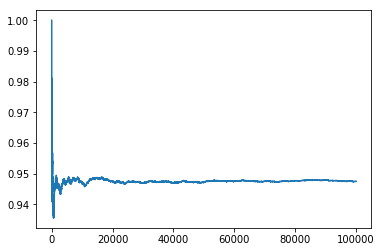

In [80]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(range(len(simulated_match_winners)), running_karpov_win_percentage)
plt.show()